# Taller Paleoclimatología y Paleoecología – 2do semestre 2020

# 1. Análisis exploratorio de datos y gráficos

### 1.1 ESTABLECE EL DIRECTORIO DE TRABAJO

In [1]:
library(tidyverse)
library(here)
here()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
here() starts at /home/mat150604/Documentos/proyectos/clasePUC



[1] "/home/mat150604/Documentos/proyectos/clasePUC"

In [2]:
X <- read_csv(here::here("data/LEM_proxies.csv"))

Rows: 501 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): ID, Unit, Facie, Montmorillonite, Muscovite, Talc, Riebeckite, Cli...
dbl (16): depth, MS, Den, FP, TS, TC, TIC, TOC, BioSi, TN, TOC/TN, d15N, d13...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### 1.2. MIREMOS LOS DATOS

In [4]:
mode(X)
class(X)
str(X) #para ver la estructura de los datos
summary(X[,5:16]) # Resumen de los datos

[1] "list"

[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

spc_tbl_ [501 × 25] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ID             : chr [1:501] "CHILL-LEM13-2C-1U 21-22 cm" "CHILL-LEM13-2C-1U 22-23 cm" "CHILL-LEM13-2C-1U 23-24 cm" "CHILL-LEM13-2C-1U 24-25 cm" ...
 $ Unit           : chr [1:501] "U1" "U1" "U1" "U1" ...
 $ Facie          : chr [1:501] "D1" "D1" "D1" "D1" ...
 $ depth          : num [1:501] 0 1 2 3 4 5 6 7 8 9 ...
 $ MS             : num [1:501] 44.8 55.9 NA 67.4 NA ...
 $ Den            : num [1:501] 1.21 1.39 NA 1.41 NA ...
 $ FP             : num [1:501] 0.883 0.773 NA 0.758 NA ...
 $ TS             : num [1:501] 0.175 0.23 0.229 0.267 0.255 ...
 $ TC             : num [1:501] 2.42 1.9 2.03 2.11 2.07 ...
 $ TIC            : num [1:501] 0 0 0 0.196 0 ...
 $ TOC            : num [1:501] 2.42 1.9 2.03 1.91 2.07 ...
 $ BioSi          : num [1:501] 19.6 18.8 19.2 20.2 19.3 ...
 $ TN             : num [1:501] 0.278 NA NA NA NA 0.21 NA NA NA NA ...
 $ TOC/TN         : num [1:501] 10.2 NA NA NA NA ...
 $ d15N           : num [1

       MS              Den              FP               TS         
 Min.   : 24.43   Min.   :1.210   Min.   :0.3045   Min.   :0.01617  
 1st Qu.: 57.16   1st Qu.:1.378   1st Qu.:0.6940   1st Qu.:0.38217  
 Median : 76.15   Median :1.481   Median :0.7170   Median :0.61781  
 Mean   : 96.70   Mean   :1.491   Mean   :0.7113   Mean   :0.76149  
 3rd Qu.:125.45   3rd Qu.:1.519   3rd Qu.:0.7805   3rd Qu.:1.11340  
 Max.   :273.65   Max.   :2.154   Max.   :0.8832   Max.   :6.82220  
 NA's   :209      NA's   :209     NA's   :209                       
       TC                TIC               TOC              BioSi      
 Min.   :-0.02204   Min.   :0.00000   Min.   :-0.1224   Min.   : 5.37  
 1st Qu.: 2.04920   1st Qu.:0.00000   1st Qu.: 1.9743   1st Qu.:15.50  
 Median : 2.86890   Median :0.04557   Median : 2.8238   Median :18.42  
 Mean   : 2.71282   Mean   :0.10466   Mean   : 2.6058   Mean   :17.64  
 3rd Qu.: 3.60770   3rd Qu.:0.18158   3rd Qu.: 3.5163   3rd Qu.:20.81  
 Max.   : 5.5943

### 1.3. Análisis gráficos - ggplot Histograma 

Warning message in (function (z, notch = FALSE, width = NULL, varwidth = FALSE, :
“some notches went outside hinges ('box'): maybe set notch=FALSE”


List of 6
 $ breaks  : num [1:13] -0.5 0 0.5 1 1.5 2 2.5 3 3.5 4 ...
 $ counts  : int [1:12] 3 43 31 23 28 94 77 75 56 47 ...
 $ density : num [1:12] 0.012 0.172 0.124 0.092 0.112 0.376 0.308 0.3 0.224 0.188 ...
 $ mids    : num [1:12] -0.25 0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 ...
 $ xname   : chr "X$TOC"
 $ equidist: logi TRUE
 - attr(*, "class")= chr "histogram"


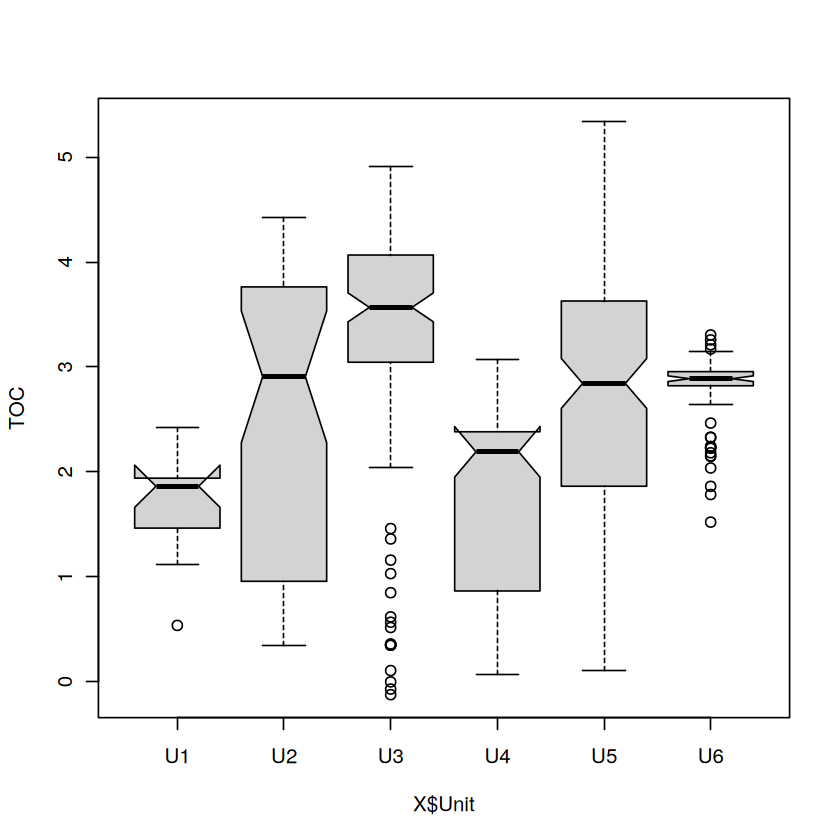

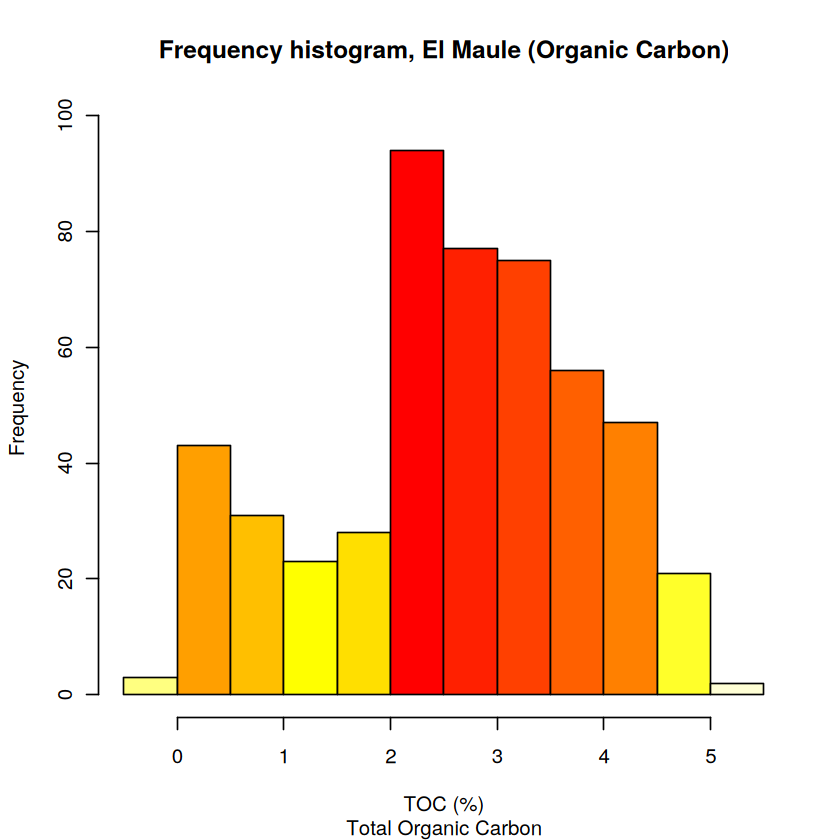

In [7]:
boxplot(X$TOC ~ X$Unit, notch=TRUE, ylab="TOC") #compara las medias visualmente
h <- hist(X$TOC, plot = F)
str(h)
plot(h, col = heat.colors(length(h$mids))[length(h$count) - rank(h$count) + 1], ylim = c(0,   max(h$count) + 5),
     main = "Frequency histogram, El Maule (Organic Carbon)",
     sub = "Total Organic Carbon",
     xlab = "TOC (%)")

Warning message in log(y01$TOC):
“NaNs produced”
Warning message in log(y01$TOC):
“NaNs produced”


null device 
          1

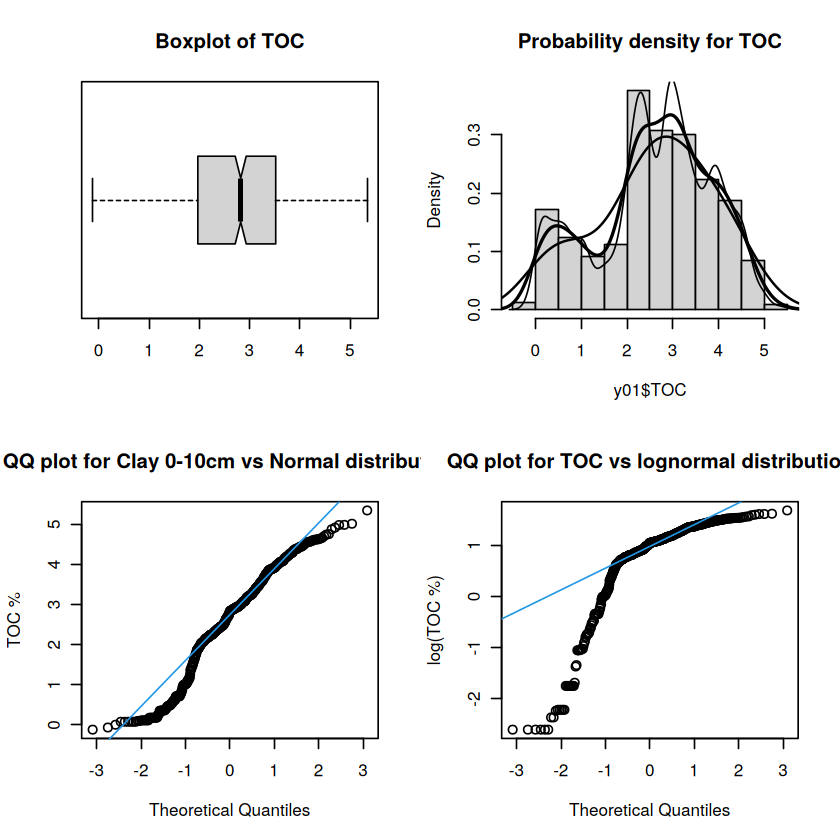

In [9]:
if(!require(dplyr)){
  install.packages("dplyr")
  library("dplyr")
}

y01<-na.omit(select(X,TOC))
y02<-na.omit(select(X,Unit,TOC,TIC,TS,TN))

par(mfrow=c(2,2)) # 2x2 matrix of plots in one figure
boxplot(y01$TOC, data=y01,notch=T, horizontal=T,main="Boxplot of TOC")
hist(y01$TOC, freq=F,main="Probability density for TOC")
lines(density(y01$TOC),lwd=2)
lines(density(y01$TOC, adj=.5),lwd=1)
lines(density(y01$TOC, adj=2),lwd=1.5)
qqnorm(y01$TOC, main="QQ plot for Clay 0-10cm vs Normal distribution",ylab="TOC %")
qqline(y01$TOC, col=4)
qqnorm(log(y01$TOC), main="QQ plot for TOC vs lognormal distribution",ylab="log(TOC %)")
qqline(log(y01$TOC), col=4)
dev.off();

# 2. The neotoma2 R package

#### El paquete neotoma2 R proporciona un conjunto de funciones para descargar y trabajar con datos de Neotoma dentro del entorno de programación R. El paquete ha sido diseñado para usuarios que desean trabajar con múltiples sitios o conjuntos de datos y admite usuarios que desean agregar sus propios datos a Neotoma.

#### Las funciones del paquete R actúan como contenedores para las llamadas API y también proporcionan algunos servicios secundarios para ayudar a que los datos funcionen de manera eficiente en el entorno R. Por ejemplo, un usuario que desea buscar todos los sitios llamados 'Marion Lake' usando R simplemente usa la función get_sites()

In [12]:
library(neotoma2)


Attaching package: ‘neotoma2’


The following object is masked from ‘package:dplyr’:

    filter


The following object is masked from ‘package:stats’:

    filter




In [13]:
maule <- get_sites(sitename = "Laguna del Maule")
maule

 siteid         sitename       lat      long altitude
  13289 Laguna del Maule -36.06427 -70.51521     2179

# 2.1 Buscando sitios

In [20]:
# Retrieve the site
plot_site <- neotoma2::get_sites(sitename = "%Lago%")
# Plot the site
neotoma2::plotLeaflet(object = plot_site)

HTML widgets cannot be represented in plain text (need html)

In [27]:
lac_sites <- neotoma2::get_sites(sitename = "%Lago %")
plotLeaflet(lac_sites)

HTML widgets cannot be represented in plain text (need html)

In [29]:
geoJSON <- '{"coordinates":
  [[
      [8.22, 44.13],
      [12.44, 41.72],
      [15.86, 37.82],
      [18.61, 39.99],
      [12.20, 45.39],
      [13.62, 45.86],
      [13.45, 46.46],
      [12.21, 47.11],
      [10.41, 46.69],
      [6.99, 45.97],
      [6.87, 44.34],
      [8.22, 44.13]
      ]],
  "type":"Polygon"}'

italy_sf <- geojsonsf::geojson_sf(geoJSON)

# Note here we use the `all_data` flag to capture all the sites within the polygon.
# We're using `all_data` here because we know that the site information is relatively small
# for Italy. If we were working in a new area or with a new search we would limit the
# search size.
italy_sites <- neotoma2::get_sites(loc = italy_sf, all_data = TRUE)

In [30]:
neotoma2::plotLeaflet(italy_sites) %>% 
  leaflet::addPolygons(map = ., 
                       data = italy_sf, 
                       color = "green")

HTML widgets cannot be represented in plain text (need html)

In [32]:
# Give information about the sites themselves, site names &cetera.
neotoma2::summary(italy_sites)
# Give the unique identifiers for sites, collection units and datasets found at those sites.
neotoma2::getids(italy_sites)

siteid,sitename,collectionunit,chronologies,datasets,types
<chr>,<chr>,<chr>,<int>,<int>,<chr>
3064,Colfiorito,COLFIORI,0,1,pollen
3064,Colfiorito,COLFIORI,0,1,geochronologic
3135,Venice,GRAMIGNE,0,1,pollen
3135,Venice,GRAMIGNE,0,1,geochronologic
3135,Venice,VENICE,0,1,pollen
3276,Lago di Martignano,MARTIGAN,0,1,loss-on-ignition
3276,Lago di Martignano,MARTIGAN,0,1,pollen
3276,Lago di Martignano,MARTIGAN,0,1,geochronologic
3276,Lago di Martignano,MARTIGAN,0,1,testate amoebae


siteid,collunitid,datasetid
<chr>,<chr>,<chr>
3064,3868,3994
3064,3868,8940
3135,3952,4079
3135,3952,8987
3135,4372,4516
3276,4123,4255
3276,4123,4256
3276,4123,9086
3276,4123,10589


In [34]:
install.packages("DT")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [35]:
neotoma2::summary(italy_sites) %>%
  DT::datatable(data = ., rownames = FALSE, 
                options = list(scrollX = "100%", dom = 't'))

HTML widgets cannot be represented in plain text (need html)

In [36]:
length(datasets(italy_sites))

[1] 328

# 3. Stratigraphic Plotting

In [45]:
italy_dl <- readRDS("data/itDownload.RDS")

In [46]:
allSamp <- samples(italy_dl)

Warning message in max(defaultchron$order, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in samples(y):
“The dataset 54269 has no default chronologies.”


In [47]:
colnames(allSamp)

[1] "age"             "agetype"         "ageolder"        "ageyounger"     
 [5] "chronologyid"    "chronologyname"  "units"           "value"          
 [9] "context"         "element"         "taxonid"         "symmetry"       
[13] "taxongroup"      "elementtype"     "variablename"    "ecologicalgroup"
[17] "analysisunitid"  "sampleanalyst"   "sampleid"        "depth"          
[21] "thickness"       "samplename"      "datasetid"       "database"       
[25] "datasettype"     "age_range_old"   "age_range_young" "datasetnotes"   
[29] "siteid"          "sitename"        "lat"             "long"           
[33] "area"            "sitenotes"       "description"     "elev"           
[37] "collunitid"

In [48]:
neotomatx <- neotoma2::taxa(italy_dl)

Warning message in max(defaultchron$order, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in samples(y):
“The dataset 54269 has no default chronologies.”


In [49]:
   neotomatx <- neotoma2::taxa(italy_dl)
neotomatx %>% 
  DT::datatable(data = head(neotomatx, n = 20), rownames = FALSE, 
                options = list(scrollX = "100%", dom = 't')) 

Warning message in max(defaultchron$order, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in samples(y):
“The dataset 54269 has no default chronologies.”


HTML widgets cannot be represented in plain text (need html)

Warning message in max(defaultchron$order, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in samples(y):
“The dataset 54269 has no default chronologies.”
`geom_smooth()` using formula = 'y ~ x'


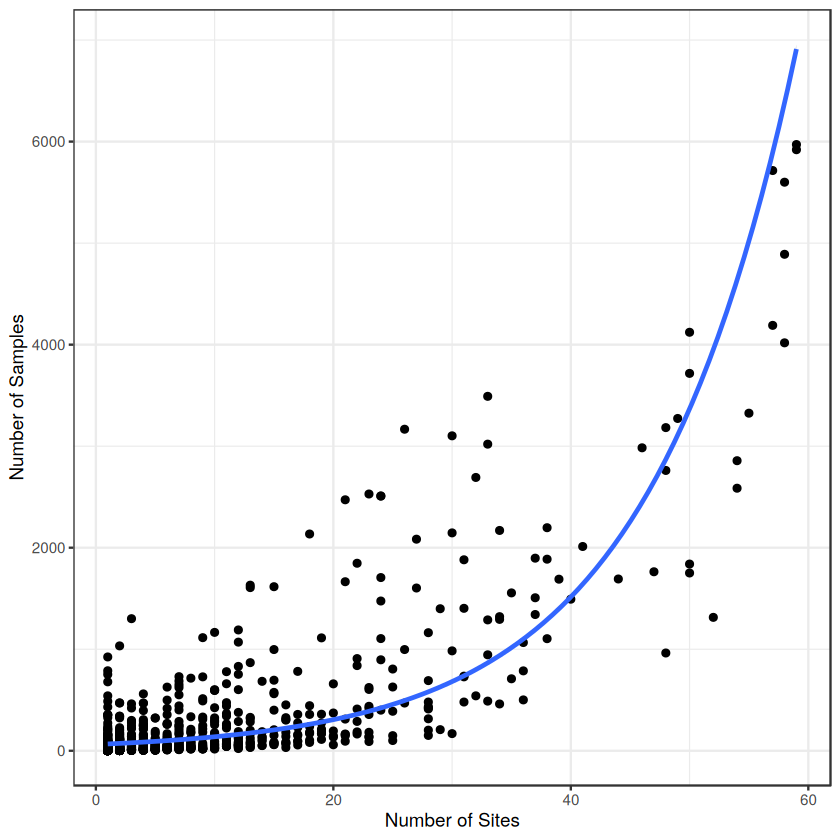

In [51]:
taxaplots <- taxa(italy_dl)
ggplot(data = taxaplots, aes(x = sites, y = samples)) +
  geom_point() +
  stat_smooth(method = 'glm', 
              method.args = list(family = 'poisson')) +
  xlab("Number of Sites") +
  ylab("Number of Samples") +
  theme_bw()

In [54]:
taxaplots <- taxa(italy_dl)
# Save the taxon list to file so we can edit it subsequently.
readr::write_csv(taxaplots, "data/mytaxontable.csv")

Warning message in max(defaultchron$order, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in samples(y):
“The dataset 54269 has no default chronologies.”


In [55]:
translation <- readr::read_csv("data/taxontable.csv")

Rows: 234 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): variablename, ecologicalgroup, harmonizedname
dbl (1): taxonid

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [56]:
translation <- readr::read_csv("data/taxontable.csv")
DT::datatable(translation, rownames = FALSE, 
                options = list(scrollX = "100%", dom = 't'))

Rows: 234 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): variablename, ecologicalgroup, harmonizedname
dbl (1): taxonid

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


HTML widgets cannot be represented in plain text (need html)

Warning message in max(defaultchron$order, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in samples(y):
“The dataset 54269 has no default chronologies.”
`geom_smooth()` using formula = 'y ~ x'


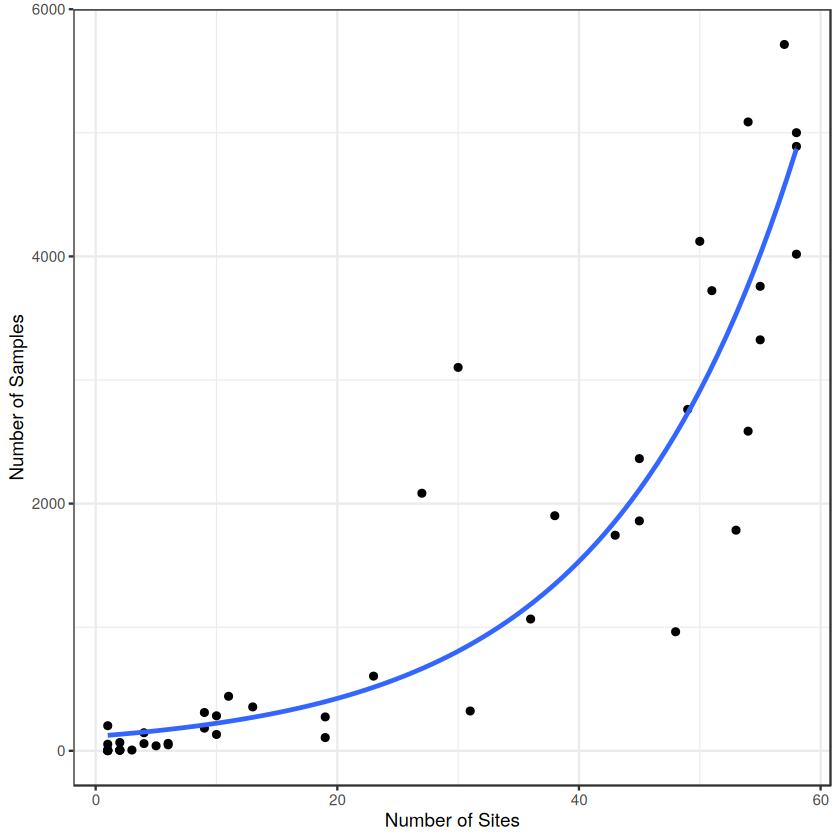

In [57]:
taxaplots <- samples(italy_dl) %>%
  inner_join(translation, by = c("variablename" = "variablename")) %>% 
  dplyr::select(!c("variablename")) %>%
  group_by(harmonizedname) %>%
  summarise(sites = length(unique(siteid)), samples = length(unique(sampleid)), .groups='keep')

ggplot(data = taxaplots, aes(x = sites, y = samples)) +
  geom_point() +
  stat_smooth(method = 'glm', 
              method.args = list(family = 'poisson')) +
  xlab("Number of Sites") +
  ylab("Number of Samples") +
  theme_bw()

In [40]:
# Get a particular site, in this case we are simply subsetting the
# `italy_dl` object:
plottingSite <- italy_dl[[1]]

# Select only pollen measured using NISP and convert to a "wide"
# table, using proportions. The first column will be "age".
# This turns our "long" table into a "wide" table:
counts <- plottingSite %>%
  samples() %>%
  toWide(ecologicalgroup = c("TRSH"),
         unit = c("NISP"),
         elementtypes = c("pollen"),
         groupby = "age",
         operation = "prop") 

counts <- counts[, colSums(counts > 0.01, na.rm = TRUE) > 5]

Warning message in toWide(., ecologicalgroup = c("TRSH"), unit = c("NISP"), elementtypes = c("pollen"), :
“All available variable names in the provided samples data frame will be included.”


In [59]:
install.packages("rioja")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [65]:
# Abrir dispositivo gráfico PNG
png("italy_plot.png", width = 1400, height = 600, res = 120)  # Ajusta el tamaño y la resolución según tus necesidades

# Perform constrained clustering:
clust <- rioja::chclust(dist(sqrt(counts)),
                        method = "coniss")

# Plot the stratigraphic plot, converting proportions to percentages:
plot <- rioja::strat.plot(counts[,-1] * 100, yvar = counts$age,
                  title = italy_dl[[1]]$sitename,
                  ylabel = "Calibrated Years BP",
                  xlabel = "Pollen (% of Trees and Shrubs)",
                  y.rev = TRUE,
                  clust = clust,
                  wa.order = "topleft",
                  scale.percent = TRUE)

rioja::addClustZone(plot, clust, 4, col = "red")

# Cerrar el dispositivo gráfico
dev.off()

Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in plot.window(...):
“"xlabel" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"xlabel" is not a graphical parameter”
Warning message in title(...):
“"xlabel" is not a graphical parameter”
Warning message in plot.window(...):
“"xlabel" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"xlabel" is not a graphical parameter”
Warning message in title(...):
“"xlabel" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"xlabel" is not a graphical parameter”
Warning message in axis(side = 1, at = xlabb, labels = xlabbt, mgp = mgpX, cex.axis = cex.axis, :
“"xlabel" is not a graphical parameter”
Warning message in plot.window(...):
“"xlabel" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"xlabel" is not a graphical parameter”
Warning message in title(...):
“"xlabel" is not a graphical parameter”
Warning messa

pdf 
  2